# <center> –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–∞–¥–∞–Ω–∏—è –ø–æ —Ü–∏—Ñ—Ä–æ–≤–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ —Å–∏–≥–Ω–∞–ª–æ–≤ </center>
# <center> –í—Ç–æ—Ä–∞—è –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ </center>
# <center> –ê–Ω–∞–ª–∏–∑ —Å–∏–≥–Ω–∞–ª–æ–≤ </center>

In [1]:
import librosa
import numpy as np
import scipy 
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib

# –ó–∞–ø—Ä–µ—Ç–∏–º numpy –≤—ã–ø–æ–ª–Ω—è—Ç—å –¥–µ–ª–µ–Ω–∏–µ –Ω–∞ 0
np.seterr(divide='raise', invalid='raise') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [18]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º –¥–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ —Å–∏–≥–Ω–∞–ª–∞. 
def draw_waveform(wav, sr, figsize=(14, 5)):
    # –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –∑–≤—É–∫–æ–≤–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –≤–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)

def draw_sig(frames, name=None, figsize=(14, 3)):
    # –û—Ç—Ä–∏—Å–æ–≤–∫–∞ —Å–∏–≥–Ω–∞–ª–∞ –≤ –≤–∏–¥–µ "–ª–µ–¥–µ–Ω—Ü–æ–≤ –Ω–∞ –ø–∞–ª–æ—á–∫–µ"
    plt.figure(figsize=figsize)
    plt.stem(frames)
    if name is not None:
        plt.legend([name])
    plt.xlabel("n")
    plt.ylabel("Energy")
    plt.show()
    

–°–æ–∑–¥–∞–¥–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–æ—Å—Ç—ã—Ö —Å–∏–≥–Ω–∞–ª–æ–≤. –û–Ω–∏ –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –¥–ª—è –¥–∞–ª—å—à–µ–π—à–µ–≥–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

In [3]:
signals = {}

### –ï–¥–∏–Ω–∏—á–Ω—ã–π –∏–º–ø—É–ª—å—Å

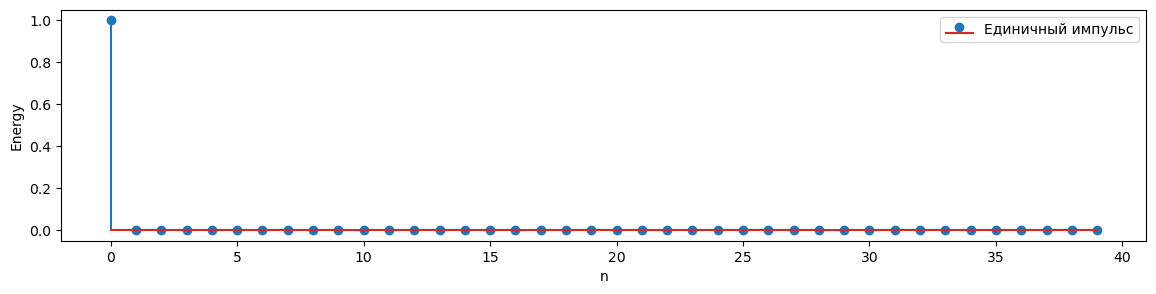

In [4]:
name = "–ï–¥–∏–Ω–∏—á–Ω—ã–π –∏–º–ø—É–ª—å—Å"
signals[name] = np.array([1] + [0]*39, dtype=float)
draw_sig(signals[name], name)

### –ï–¥–∏–Ω–∏—á–Ω—ã–π —Å–∫–∞—á–æ–∫

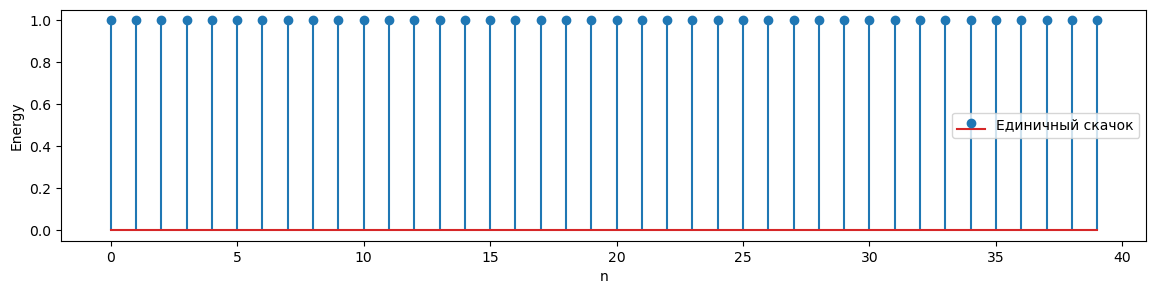

In [5]:
name = "–ï–¥–∏–Ω–∏—á–Ω—ã–π —Å–∫–∞—á–æ–∫"
signals[name] = np.array([1]*40 ,dtype=float) 
draw_sig(signals[name], name)

### –°–∏–Ω—É—Å

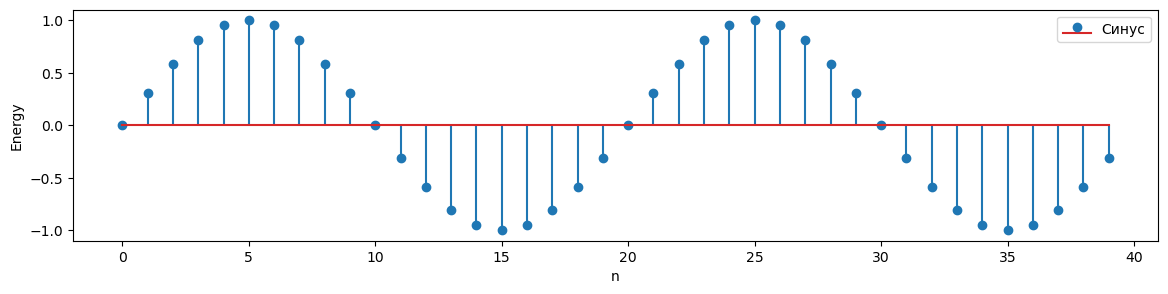

In [6]:
name = "–°–∏–Ω—É—Å"
signals[name] = np.sin(np.pi * np.arange(40)/10)
draw_sig(signals[name], name)

### –®—É–º

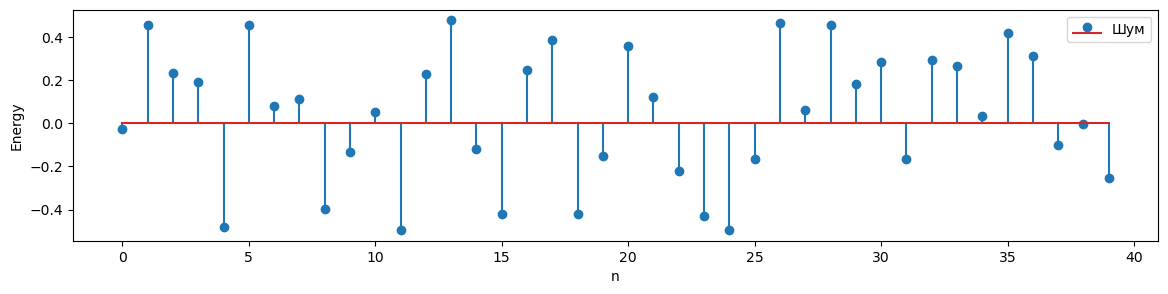

In [7]:
name = "–®—É–º"
signals[name] = np.random.random(40)-0.5
draw_sig(signals[name], name)

-------------------------------
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ
–ü—Ä–µ–∂–¥–µ, —á–µ–º –ø–µ—Ä–µ–π—Ç–∏ –∫ –∞–Ω–∞–ª–∏–∑—É —Å–∏–≥–Ω–∞–ª–æ–≤, –Ω–∞–¥–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è, —á—Ç–æ —Ç–∞–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ. 
> –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ (—Å–∏–º–≤–æ–ª ‚Ñ±) ‚Äî –æ–ø–µ—Ä–∞—Ü–∏—è, —Å–æ–ø–æ—Å—Ç–∞–≤–ª—è—é—â–∞—è –æ–¥–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥—Ä—É–≥—É—é —Ñ—É–Ω–∫—Ü–∏—é –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –≠—Ç–∞ –Ω–æ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –æ–ø–∏—Å—ã–≤–∞–µ—Ç –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã (¬´–∞–º–ø–ª–∏—Ç—É–¥—ã¬ª) –ø—Ä–∏ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–∏ –∏—Å—Ö–æ–¥–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –Ω–∞ —ç–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã–µ —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏–µ ‚Äî –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è —Å —Ä–∞–∑–Ω—ã–º–∏ —á–∞—Å—Ç–æ—Ç–∞–º–∏ (–ø–æ–¥–æ–±–Ω–æ —Ç–æ–º—É, –∫–∞–∫ –º—É–∑—ã–∫–∞–ª—å–Ω—ã–π –∞–∫–∫–æ—Ä–¥ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã—Ä–∞–∂–µ–Ω –≤ –≤–∏–¥–µ —Å—É–º–º—ã –º—É–∑—ã–∫–∞–ª—å–Ω—ã—Ö –∑–≤—É–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –µ–≥–æ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç). [Wiki](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5)



–§–æ—Ä–º—É–ª–∞ –ø—Ä—è–º–æ–≥–æ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –§—É—Ä—å–µ (–î–ü–§, Discrete Fourier Transform, DFT):
$$ X_k = \sum_{n=0}^{N-1} x_{n} \cdot e^{-i \frac{2\pi}{N} k n} $$


# –ó–∞–¥–∞–Ω–∏–µ 1 (2 –±–∞–ª–ª–∞)
–†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ. –°—Ä–∞–≤–Ω–∏—Ç—å —Å —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–µ–π *scipy.fft.fft*

In [8]:
import math
import cmath
def DFT(x):
    N = len(x)
    result = []
    for k in range(N):
        sum_real = 0
        sum_imag = 0
        for n in range(N):
            angle = 2 * np.pi * k * n / N
            sum_real += x[n] * np.cos(angle)
            sum_imag += -x[n] * np.sin(angle)
        result.append(complex(sum_real, sum_imag))
    return np.array(result)
    raise NotImplementedError()

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –±–∏–±–ª–∏–æ—Ç–µ–∫–æ–π scipy

In [9]:
def test_DTF(x, transform=DFT):
    scipy_result = scipy.fft.fft(x)
    curr_result = transform(x)
    if scipy_result.shape != curr_result.shape:
        print("TEST_FAILED")
        print(f"Your spectrogram shape is {curr_result.shape}. "
              f"Scipy spectrogram shape is {scipy_result.shape}")
        return -1
    if not np.allclose(curr_result, scipy_result):
        print("TEST FAILED")
        print(f"scipy spectrogram: {scipy_result}")
        print(f"Your DTF spectrogram: {curr_result}")
        print(f"Average diff is {np.mean(np.abs(scipy_result - curr_result))}")
        return -2
    print("TEST PASSED")
    return 0

for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig) == 0, "Check you implementation"
print("All ok!")

Checking '–ï–¥–∏–Ω–∏—á–Ω—ã–π –∏–º–ø—É–ª—å—Å'
TEST PASSED
Checking '–ï–¥–∏–Ω–∏—á–Ω—ã–π —Å–∫–∞—á–æ–∫'
TEST PASSED
Checking '–°–∏–Ω—É—Å'
TEST PASSED
Checking '–®—É–º'
TEST PASSED
All ok!


–ö–ª–∞—Å–∏—á–µ—Å–∫–æ–µ –î–ü–§ –∏–º–µ–µ—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ - —Å–ª–æ–∂–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞ $O(N^2)$. –ù–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç —Å—É—â–µ—Å—Ç–≤—É—é—Ç —á—É—Ç—å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –§—É—Ä—å–µ, –∫–æ—Ç–æ—Ä—ã–µ –∏–∑–±–∞–≤–ª—è—é—Ç—Å—è –æ—Ç –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Å–ª–æ–∂–Ω–æ—Å—Ç–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –∞–ª–≥–æ—Ä–∏—Ç–º –±—ã—Å—Ç—Ä–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –§—É—Ä—å–µ (Fast Fourier Transform, FFT) –∏–º–µ–µ—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç—å $O(N log(N))$, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –µ–≥–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ –±—ã—Å—Ç—Ä—ã–º –Ω–∞ –¥–ª–∏–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—è—Ö. 

# –ó–∞–¥–∞–Ω–∏–µ 1.1* (1 –±–∞–ª–ª)
–†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –±—ã—Å—Ç—Ä–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ. –°—Ä–∞–≤–Ω–∏—Ç—å —Å scipy.fft.fft

**–ü–æ–¥—Å–∫–∞–∑–∫–∞:** —É—á—Ç–∏—Ç–µ, —á—Ç–æ –¥–ª—è –ë–ü–§ –Ω–∞–º –Ω—É–∂–Ω–æ, —á—Ç–æ–±—ã –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç—Å—á–µ—Ç–æ–≤ —Å–∏–≥–Ω–∞–ª–∞ –±—ã–ª–æ —Å—Ç–µ–ø–µ–Ω—å—é –¥–≤–æ–π–∫–∏

In [83]:
def FFT(x):
    N = len(x)
    
    # –ï—Å–ª–∏ –¥–ª–∏–Ω–∞ —Å–∏–≥–Ω–∞–ª–∞ –º–µ–Ω—å—à–µ –∏–ª–∏ —Ä–∞–≤–Ω–∞ 1, –≤–æ–∑–≤—Ä–∞—â–∞–µ–º —Å–∏–≥–Ω–∞–ª
    if N <= 1:
        return x
    
    # –ï—Å–ª–∏ –¥–ª–∏–Ω–∞ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–µ–ø–µ–Ω—å—é 2, –¥–æ–ø–æ–ª–Ω–∏—Ç—å –Ω—É–ª—è–º–∏
    if N % 2 != 0:
        next_power_of_2 = 1 << (N - 1).bit_length()  # 2**ceil(log2(N))
        x = np.pad(x, (0, next_power_of_2 - N), mode='constant')
        N = next_power_of_2  # –û–±–Ω–æ–≤–ª—è–µ–º N –ø–æ—Å–ª–µ –¥–æ–ø–æ–ª–Ω–µ–Ω–∏—è

    # –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ —Å–∏–≥–Ω–∞–ª–∞ –Ω–∞ —á–µ—Ç–Ω—ã–µ –∏ –Ω–µ—á–µ—Ç–Ω—ã–µ —ç–ª–µ–º–µ–Ω—Ç—ã
    even = FFT(x[0::2])   # –≠–ª–µ–º–µ–Ω—Ç—ã —Å —á–µ—Ç–Ω—ã–º–∏ –∏–Ω–¥–µ–∫—Å–∞–º–∏
    odd = FFT(x[1::2])    # –≠–ª–µ–º–µ–Ω—Ç—ã —Å –Ω–µ—á–µ—Ç–Ω—ã–º–∏ –∏–Ω–¥–µ–∫—Å–∞–º–∏
    
    # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    T = np.exp(-2j * np.pi * np.arange(N) / N) * odd
    return np.concatenate([even + T[:N // 2], even - T[:N // 2]])
    raise NotImplementedError()

In [84]:
for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig, transform=FFT) == 0, "Check you implementation"
print("All ok!")

Checking '–ï–¥–∏–Ω–∏—á–Ω—ã–π –∏–º–ø—É–ª—å—Å'


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

–ï—Å–ª–∏ –≤—ã –∏–∑–º–µ–Ω—è–ª–∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã—Ö —Å–∏–≥–Ω–∞–ª–æ–≤, –Ω–µ –∑–∞–±—É–¥—å—Ç–µ –≤–µ—Ä–Ω—É—Ç—å –∏—Ö –∏–∑–Ω–∞—á–∞–ª—å–Ω—É—é –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å

In [ ]:
# YOUR CODE HERE

# –ê–º–ø–ª–∏—Ç—É–¥–Ω—ã–π –∏ —Ñ–∞–∑–æ–≤—ã–π —Å–ø–µ–∫—Ç—Ä—ã
–ü–æ—Å–∫–æ–ª—å–∫—É –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –≤ –∫–æ–º–ø–ª–µ–∫—Å—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏, –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞–ø—Ä—è–º—É—é –ø—Ä–æ–±–ª–µ–º–∞—Ç–∏—á–Ω–æ. –î–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Å–∏–≥–Ω–∞–ª–æ–≤ –ø—Ä–∏–Ω—è—Ç–æ —Ä–∞–∑–±–∏–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –§—É—Ä—å–µ –Ω–∞ –¥–≤–∞ —Å–ø–µ–∫—Ç—Ä–∞: –∞–º–ø–ª–∏—Ç—É–¥–Ω—ã–π –∏ —Ñ–∞–∑–æ–≤—ã–π. –ê–º–ø–ª–∏—Ç—É–¥–Ω—ã–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è –º–æ–¥—É–ª—å —Å–∏–≥–Ω–∞–ª–∞, –∞ —Ñ–∞–∑–æ–≤—ã–π - –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —É–≥–æ–ª, –æ–±—Ä–∞–∑—É–µ–º—ã–π –Ω–∞ –∫–æ–º–ø–ª–µ–∫—Å–Ω–æ–π –ø–ª–æ—Å–∫–æ—Å—Ç–∏. 
# –ó–∞–¥–∞–Ω–∏–µ 2 (1 –±–∞–ª–ª)

–†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∞–º–ø–ª–∏—Ç—É–¥–Ω–æ–≥–æ –∏ —Ñ–∞–∑–æ–≤–æ–≥–æ —Å–ø–µ–∫—Ç—Ä–∞

In [10]:
#—Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∞–º–ø–ª–∏—Ç—É–¥–Ω–æ–≥–æ —Å–ø–µ–∫—Ç—Ä–∞
def get_amplitude_from_spec(spec):
    amplitude = np.abs(spec)
    return amplitude
    raise NotImplementedError()

#—Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è —Ñ–∞–∑–æ–≤–æ–≥–æ —Å–ø–µ–∫—Ç—Ä–∞
def get_phi_from_spec(spec):
    phase = np.angle(spec)
    return phase

    raise NotImplementedError()

In [11]:
def check_mean_var(sig, mean=None, var=None):
    if mean is not None and np.mean(sig) != mean:
        print(f"Bad mean. Expected {mean}, got {np.mean(sig)}")
        return False
    if var is not None and np.var(sig) != var:
        print(f"Bad var. Expected {var}, got {np.var(sig)}")
        return False
    return True

_spec = scipy.fft.fft(np.array([1]+[0]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 0.0), \
    "Wrong Amplitude"
assert check_mean_var(get_phi_from_spec(_spec), 0.0, 0.0), \
    "Wrong Phase"

    
_spec = scipy.fft.fft(np.array([1]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 9.0), \
    "Wrong  Amplitude"
assert get_amplitude_from_spec(_spec)[0] == 10, \
    "Wrong Amplitude"
assert get_phi_from_spec(_spec)[0] == 0, \
    "Wrong phase"

_spec = scipy.fft.fft(scipy.fft.ifft(np.array([0] + [10+5j]+[0]*6 + [10-5j])))
assert get_amplitude_from_spec(_spec).round(1)[1] == 11.2 , \
    "Wrong Amplitude. Make sure it is a complex number module."
assert get_phi_from_spec(_spec).round(1)[1] == 0.5 , \
    "Wrong Amplitude. Make sure it is an angle."

   
print("All OK!")

All OK!


–û–ø—Ä–µ–¥–µ–ª–∏–º –µ—â–µ –æ–¥–Ω—É —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏. –¢–µ–ø–µ—Ä—å –±—É–¥–µ–º —Ä–∏—Å–æ–≤–∞—Ç—å —Å–∏–≥–Ω–∞–ª –≤ —á–∞—Å—Ç–æ—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏

In [12]:
def draw_spec(spec, name=None, draw_A=True, draw_p=True, figsize=(14, 3)):
    if len(spec)<100:
        # –†–∏—Å—É–µ–º —Ç–æ—á–∫–∏ –∫–∞–∫ "–ª–µ–¥–µ–Ω—Ü—ã –Ω–∞ –ø–∞–ª–æ—á–∫–∞—Ö"
        draw_func = plt.stem
    else:
        # –ü—Ä–∏ –±–æ–ª—å—à–æ–º N "–ª–µ–¥–µ–Ω—Ü—ã" –≤—ã–≥–ª—è–¥—è—Ç –ø–ª–æ—Ö–æ, 
        # –ü–æ—ç—Ç–æ–º—É –±—É–¥–µ–º —Ä–∏—Å–æ–≤–∞—Ç—å –æ–≥–∏–±–∞—é—â—É—é —Ñ—É–Ω–∫—Ü–∏—é
        draw_func = plt.plot
    
    if draw_A:
        plt.figure(figsize=figsize)
        plt.title("Amplitude spectrum")
        spec_A = get_amplitude_from_spec(spec)
        draw_func(spec_A)
        plt.ylabel("Magnitude")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
        
    if draw_p:
        plt.figure(figsize=figsize)
        plt.title("Phase spectrum")
        phi = get_phi_from_spec(spec)
        draw_func(phi)
        plt.ylabel("Radian")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
    return 

# –ó–∞–¥–∞–Ω–∏–µ 2.1 (0.5 –±–∞–ª–ª–∞)
–ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Å–ø–µ–∫—Ç—Ä—ã –¥–ª—è –≤—Å–µ—Ö —Å–∏–≥–Ω–∞–ª–æ–≤ –∏–∑ –∫–æ–ª–ª–µ–∫—Ü–∏–∏ signals –∏ –æ—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã:
<!-- 1. –ü–æ—á–µ–º—É –∞–º–ø–ª–∏—Ç—É–¥–∞ –≤—Å–µ—Ö –≥–∞—Ä–º–æ–Ω–∏–∫ –µ–¥–∏–Ω–∏—á–Ω–æ–≥–æ –∏–º–ø—É–ª—å—Å–∞ —Ä–∞–≤–Ω–∞ –µ–¥–∏–Ω–∏—Ü–µ? 
1. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–º–æ—Ç—Ä—è –Ω–∞ –∞–º–ø–ª–∏—Ç—É–¥–Ω—ã–π —Å–ø–µ–∫—Ç—Ä? –ê –Ω–∞ —Ñ–∞–∑–æ–≤—ã–π? 
1. –ö–∞–∫ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –Ω–æ–º–µ—Ä –æ—Ç—Å—á–µ—Ç–∞ –≤ —á–∞—Å—Ç–æ—Ç—É?  
1. –ß—Ç–æ –≤ —Ñ–∞–∑–æ–≤–æ–º —Å–ø–µ–∫—Ç—Ä–µ —è–≤–ª—è–µ—Ç—Å—è –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π, –∞ —á—Ç–æ - —à—É–º–æ–º? –ü–æ—á–µ–º—É? -->

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è:

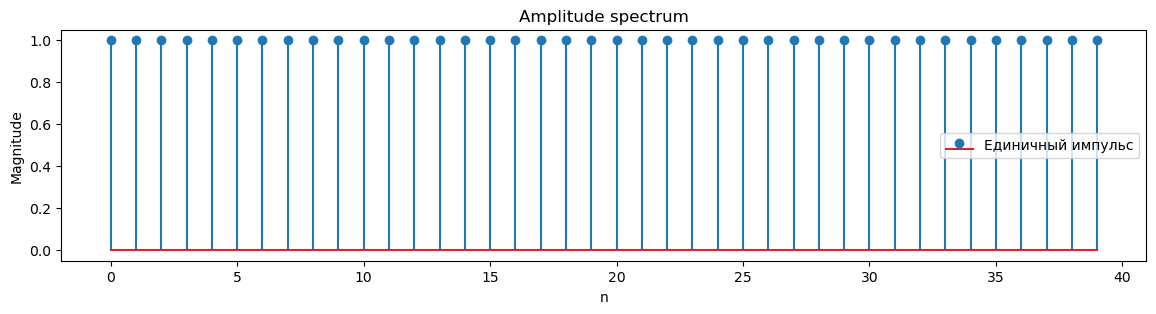

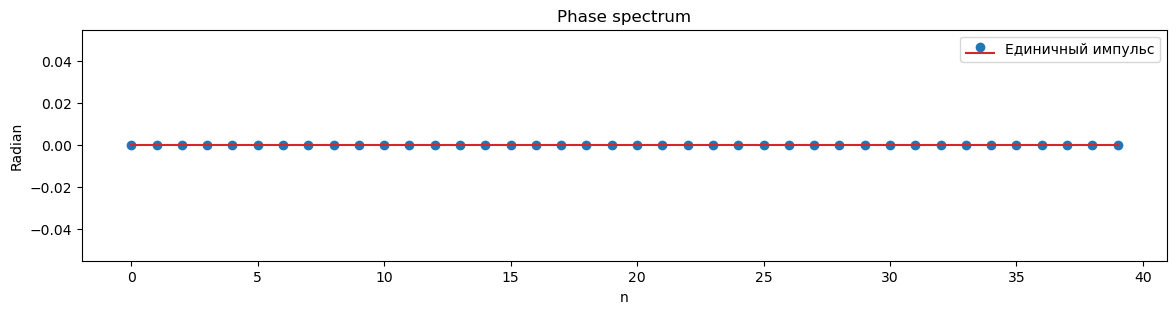

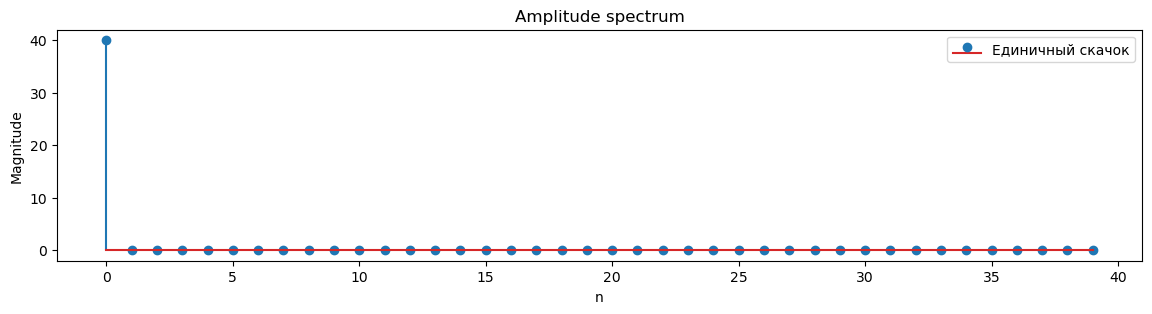

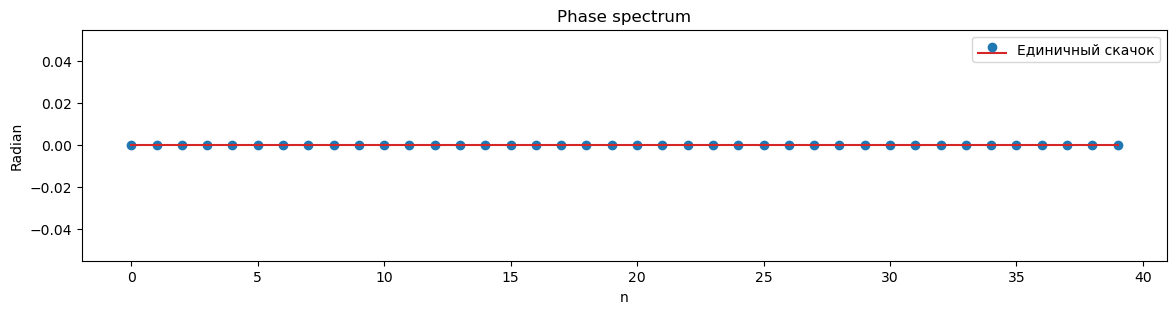

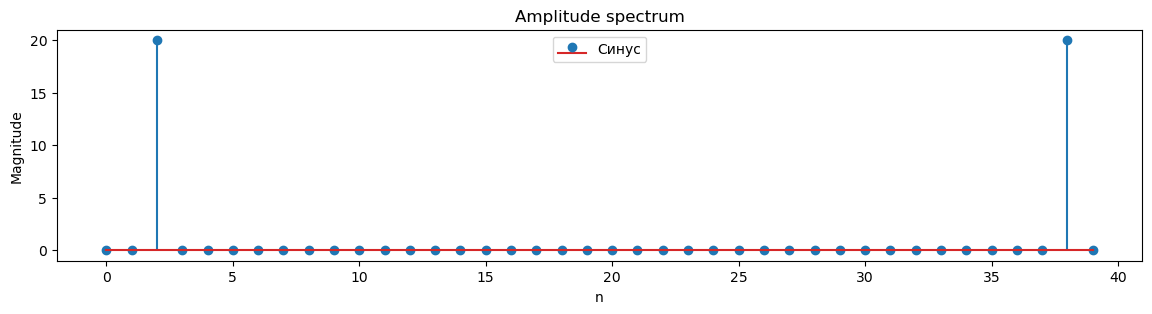

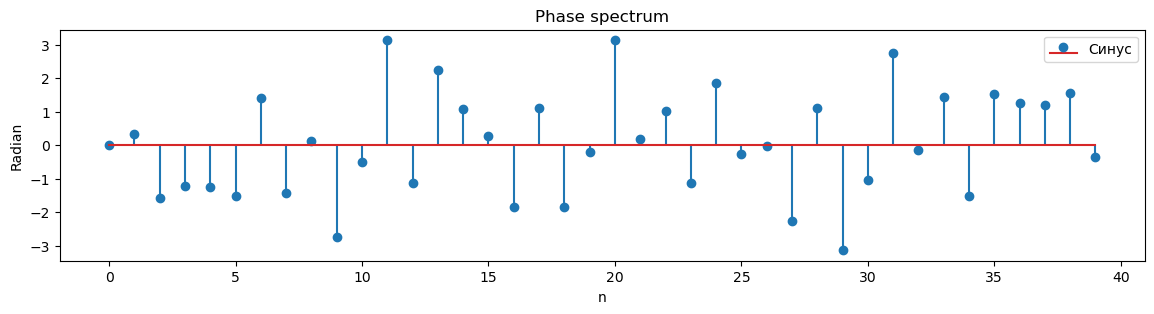

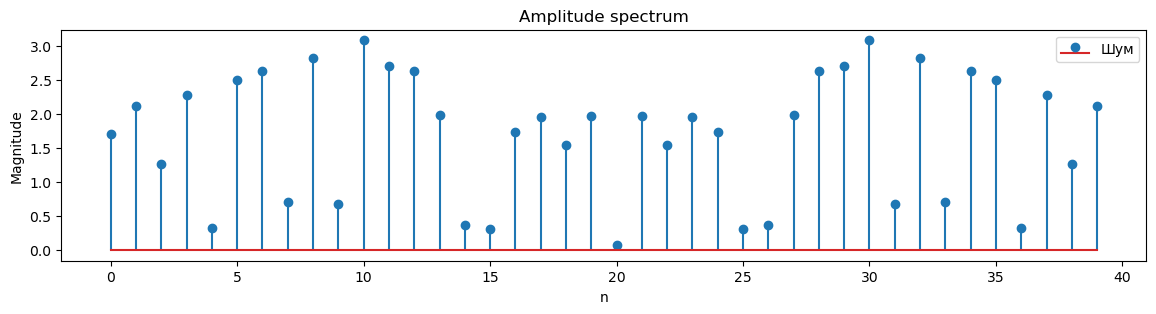

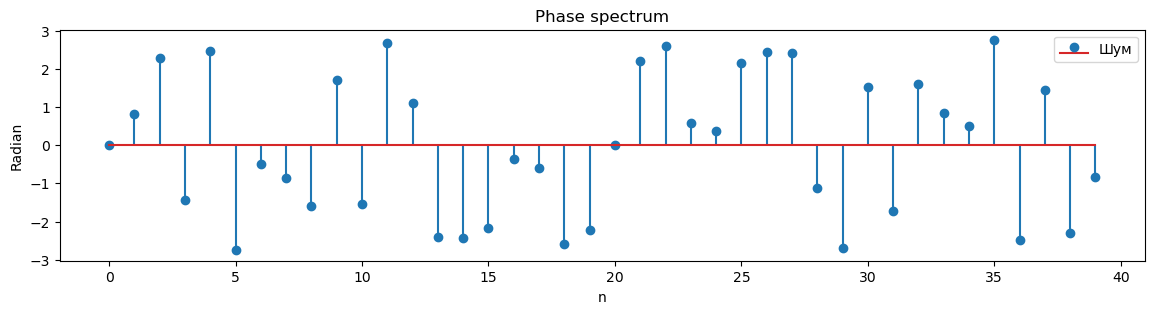

In [13]:
for name, signal in signals.items():
    fft_result = np.fft.fft(signal)
    draw_spec(fft_result, name=name)

### 1.–ü–æ—á–µ–º—É –∞–º–ø–ª–∏—Ç—É–¥–∞ –≤—Å–µ—Ö –≥–∞—Ä–º–æ–Ω–∏–∫ –µ–¥–∏–Ω–∏—á–Ω–æ–≥–æ –∏–º–ø—É–ª—å—Å–∞ —Ä–∞–≤–Ω–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–µ?

–ï–¥–∏–Ω–∏—á–Ω—ã–π –∏–º–ø—É–ª—å - –¥–µ–ª—å—Ç–∞-—Ñ—É–Ω–∫—Ü–∏—è –î–∏—Ä–∞–∫–∞, –∫–æ—Ç–æ—Ä–∞—è –∏–º–µ–µ—Ç –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ –±–æ–ª—å—à—É—é –∞–º–ø–ª–∏—Ç—É–¥—É –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ ùë°=0 –∏ –Ω—É–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –ª—é–±–æ–µ –¥—Ä—É–≥–æ–µ –≤—Ä–µ–º—è. –ü—Ä–∏ —ç—Ç–æ–º –µ–≥–æ –∏–Ω—Ç–µ–≥—Ä–∞–ª –ø–æ –≤—Å–µ–π –æ—Å–∏ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞–≤–µ–Ω –µ–¥–∏–Ω–∏—Ü–µ. –î–µ–ª—å—Ç–∞-—Ñ—É–Ω–∫—Ü–∏—è –ø–µ—Ä–µ–¥–∞–µ—Ç –≤—Å—é —Å–≤–æ—é —ç–Ω–µ—Ä–≥–∏—é –Ω–∞ –≤—Å–µ —á–∞—Å—Ç–æ—Ç—ã. –¢.–∫. –æ–Ω–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ —á–∞—Å—Ç–æ—Ç—ã (–∏–∑-–∑–∞ –µ–µ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–π —É–∑–∫–æ–π —Ñ–æ—Ä–º—ã), –æ–Ω–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –∏–¥–µ–∞–ª—å–Ω—ã–π "—Ñ–∏–ª—å—Ç—Ä", –ø–æ–∑–≤–æ–ª—è—é—â–∏–π –≤—Å–µ–º —á–∞—Å—Ç–æ—Ç–∞–º –ø—Ä–æ—Ö–æ–¥–∏—Ç—å –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π. –≠—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ç–æ–º—É, —á—Ç–æ –∞–º–ø–ª–∏—Ç—É–¥–∞ –≤—Å–µ—Ö –≥–∞—Ä–º–æ–Ω–∏–∫ –±—É–¥–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π (–∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞), –∏  —Ç–∞–∫–∞—è —Ñ–æ—Ä–º–∞ —Å–∏–≥–Ω–∞–ª–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ —á–∞—Å—Ç–æ—Ç—ã –≤ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π —Å—Ç–µ–ø–µ–Ω–∏.

### 2. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–º–æ—Ç—Ä—è –Ω–∞ –∞–º–ø–ª–∏—Ç—É–¥–Ω—ã–π —Å–ø–µ–∫—Ç—Ä? –ê –Ω–∞ —Ñ–∞–∑–æ–≤—ã–π?

–ê–º–ø–ª–∏—Ç—É–¥–Ω—ã–π —Å–ø–µ–∫—Ç—Ä –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ —á–∞—Å—Ç–æ—Ç—ã –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ —Å–∏–≥–Ω–∞–ª–µ –∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ –≤—ã—Ä–∞–∂–µ–Ω—ã.
–§–∞–∑–æ–≤—ã–π —Å–ø–µ–∫—Ç—Ä –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å, –∫–∞–∫ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —á–∞—Å—Ç–æ—Ç—ã –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É—é—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ –∫–∞–∫ –æ–Ω–∏ –≤–ª–∏—è—é—Ç –Ω–∞ —Ñ–æ—Ä–º—É —Å–∏–≥–Ω–∞–ª–∞.

### 3. –ö–∞–∫ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –Ω–æ–º–µ—Ä –æ—Ç—Å—á–µ—Ç–∞ –≤ —á–∞—Å—Ç–æ—Ç—É?

–ß—Ç–æ–±—ã –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –Ω–æ–º–µ—Ä –æ—Ç—Å—á–µ—Ç–∞ –≤ —á–∞—Å—Ç–æ—Ç—É –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞, –≤–∞–º –Ω—É–∂–Ω–æ –∑–Ω–∞—Ç—å —á–∞—Å—Ç–æ—Ç—É –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏ –∏ –Ω–æ–º–µ—Ä –æ—Ç—Å—á–µ—Ç–∞ (n). –§–æ—Ä–º—É–ª–∞ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –Ω–æ–º–µ—Ä–∞ –æ—Ç—Å—á–µ—Ç–∞ –≤ —á–∞—Å—Ç–æ—Ç—É –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —á–∞—Å—Ç–æ—Ç—É –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏ (–≤ –ì—Ü) —É–º–Ω–æ–∂–∏—Ç—å –Ω–∞ –Ω–æ–º–µ—Ä –æ—Ç—Å—á–µ—Ç–∞ –∏ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –Ω–∞ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç—Å—á–µ—Ç–æ–≤ –≤ —Å–∏–≥–Ω–∞–ª–µ.

### 4. –ß—Ç–æ –≤ —Ñ–∞–∑–æ–≤–æ–º —Å–ø–µ–∫—Ç—Ä–µ —è–≤–ª—è–µ—Ç—Å—è –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π, –∞ —á—Ç–æ - —à—É–º–æ–º? –ü–æ—á–µ–º—É?

In [ ]:
# YOUR ANSWER HERE

# –û–∫–æ–Ω–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ
–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ –¥–µ–ª–∞–µ—Ç –ø–µ—Ä–µ—Ö–æ–¥ –∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏ –≤ —á–∞—Å—Ç–æ—Ç–Ω—É—é, –ø–æ–∑–≤–æ–ª—è—è –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏–µ —Å–∏–≥–Ω–∞–ª –≥–∞—Ä–º–æ–Ω–∏–∫–∏. –û–¥–Ω–∞–∫–æ —ç—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ —É–¥–æ–±–Ω–æ. –í —Ä–µ–∞–ª—å–Ω—ã—Ö —Å–∏–≥–Ω–∞–ª–∞—Ö –∑–∞—á–∞—Å—Ç—É—é —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏–µ –∏—Ö –≥–∞—Ä–º–æ–Ω–∏–∫–∏ –∏–∑–º–µ–Ω—è—é—Ç—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫–∞–∂–¥–∞—è –±—É–∫–≤–∞ –≤ —Å–ª–æ–≤–µ –∏–º–µ–µ—Ç —Å–≤–æ–π –Ω–∞–±–æ—Ä –æ—Å–Ω–æ–≤–Ω—ã—Ö –≥–∞—Ä–º–æ–Ω–∏–∫, –∏ –ø—Ä–æ—Å—Ç–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ –Ω–µ —Å–∏–ª—å–Ω–æ –ø–æ–º–æ–∂–µ—Ç –Ω–∞–º –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, —á—Ç–æ –±—ã–ª–æ —Å–∫–∞–∑–∞–Ω–æ. –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ç–∞–∫–∏–µ —Å–∏–≥–Ω–∞–ª—ã, –æ–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è [–û–∫–æ–Ω–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ](https://ru.wikipedia.org/wiki/–û–∫–æ–Ω–Ω–æ–µ_–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ_–§—É—Ä—å–µ). –¢–∞–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≥–∞—Ä–º–æ–Ω–∏–∫–∏ —Å–∏–≥–Ω–∞–ª–∞ –≤ –∫–æ—Ä–æ—Ç–∫–∏—Ö –ø—Ä–æ–º–µ–∂—É—Ç–∫–∞—Ö –≤—Ä–µ–º–µ–Ω–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—É—é –æ—Å—å –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—ã.
# –ó–∞–¥–∞–Ω–∏–µ 3 (2 –±–∞–ª–ª–∞)
–†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –æ–∫–æ–Ω–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ (Short-time Fourier transform), –ø–æ–ª—å–∑—É—è—Å—å —Ç–æ–ª—å–∫–æ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞–º–∏ *numpy* –∏ *scipy*. –°—Ä–∞–≤–Ω–∏—Ç—å —Å *librosa.stft*


In [14]:
from scipy.signal import get_window
def STFT(x, n_fft=2048, hop_length=512, window='hann'):
    # x - signal
    # n_fft - fft window size 
    # hop_length - step size between ffts
    # window - window type. See scipy.signal.get_window
    # return spectrogram 

    if True:
        x = np.pad(x, (n_fft // 2, n_fft // 2), mode='constant')
    
    x_length = len(x)
    win = get_window(window, n_fft, fftbins=True)
    num_windows = (x_length - n_fft) // hop_length + 1
    stft_matrix = np.zeros((n_fft // 2 + 1, num_windows), dtype=complex)
    
    for i in range(num_windows):
        start = i * hop_length
        end = start + n_fft
        segment = x[start:end] * win 
        stft_matrix[:, i] = np.fft.rfft(segment) 

    return stft_matrix

    raise NotImplementedError()

In [15]:
def test_stft(x, n_fft=2048, hop_length=512, window='hann'):
    librosa_result = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window='hann', center=True)
    result = STFT(x, n_fft=n_fft, hop_length=hop_length, window='hann')
    if librosa_result.shape != result.shape:
        print(f"Your shape {result.shape} != librosa stft shape {librosa_result.shape} ")
        return -1 
    if not np.allclose(librosa_result, result):
        print(f"Wrong results. Diff {np.abs(librosa_result-result)}")
        return -2
    return 0
        
for name, sig in signals.items():
    print(f"Checking '{name}'")
    for n_fft in (8, 4):
        for hop_length in (n_fft//4, n_fft//2):
            assert test_stft(sig, n_fft=n_fft, hop_length=hop_length)==0, \
                f"Test failed. Params n_fft {n_fft}. Hop_length {hop_length}"
    print("ok")
print("All ok!")

Checking '–ï–¥–∏–Ω–∏—á–Ω—ã–π –∏–º–ø—É–ª—å—Å'
ok
Checking '–ï–¥–∏–Ω–∏—á–Ω—ã–π —Å–∫–∞—á–æ–∫'
ok
Checking '–°–∏–Ω—É—Å'
ok
Checking '–®—É–º'
ok
All ok!


–û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏

In [16]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏
def draw_stft(X, sr, figsize=(14, 5)):
    plt.figure(figsize=figsize)
    # X - –∫–æ–º–ø–ª–µ–∫—Å—Ç–Ω–∞—è —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ 
    # –î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —ç–Ω–µ—Ä–≥–∏–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤–∑—è—Ç—å –º–æ–¥—É–ª—å
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.show()

# –ê–Ω–∞–ª–∏–∑ —Å–∏–≥–Ω–∞–ª–æ–≤
–¢–µ–ø–µ—Ä—å –º–æ–∂–Ω–æ –ø—Ä–∏—Å—Ç—É–ø–∏—Ç—å –∫ –∞–Ω–∞–ª–∏–∑—É –∑–≤—É–∫–æ–≤—ã—Ö —Å–∏–≥–Ω–∞–ª–æ–≤.
–í–æ –≤—Ä–µ–º—è –∞–Ω–∞–ª–∏–∑–∞ —Å–∏–≥–Ω–∞–ª–æ–≤ –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –≤—Å–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –≤—ã—à–µ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã. 


----------------------------------
## –ê–Ω–∞–ª–∏–∑ –ø–∞—Ä–æ–≤–æ–∑–Ω–æ–≥–æ –≥—É–¥–∫–∞
–ù–∞—á–Ω–µ–º —Å –ø—Ä–æ—Å—Ç–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞, —Å–æ—Å—Ç–æ—è—â–µ–≥–æ –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –æ—Å–Ω–æ–≤–Ω—ã—Ö –≥–∞—Ä–º–æ–Ω–∏–∫ –∏ —à—É–º–∞.

–ó–∞–≥—Ä—É–∑–∏–º –∞—É–¥–∏–æ —Ñ–∞–π–ª —Å –ø–∞—Ä–æ–≤–æ–∑–Ω—ã–º –≥—É–¥–∫–æ–º

Len is 82175 ( ). Sample rate is 22050


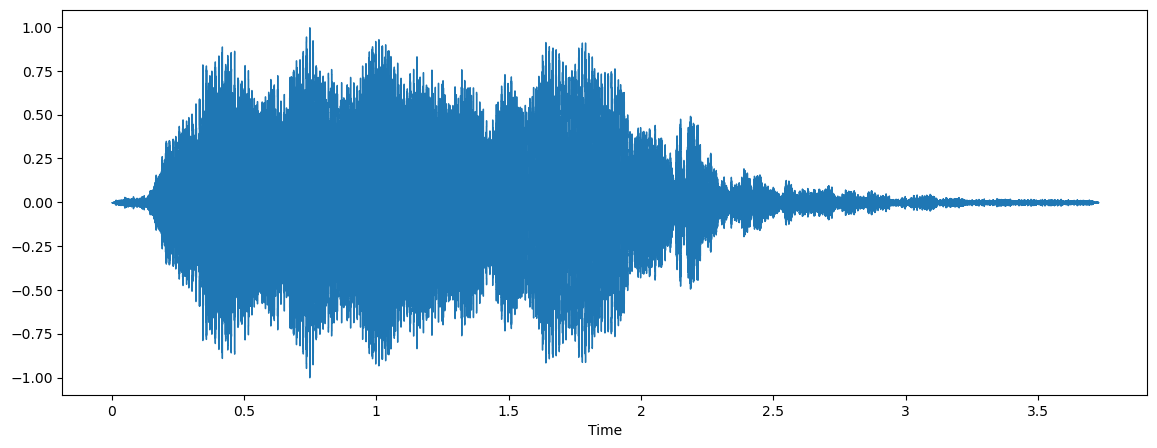

In [19]:
# –ó–∞–≥—Ä—É–∑–∏–º –∞—É–¥–∏–æ —Ñ–∞–π–ª —Å –ø–∞—Ä–æ–≤–æ–∑–Ω—ã–º –≥—É–¥–∫–æ–º
train_whistle, tw_sr = librosa.core.load("train_whistle.wav")
print(f"Len is {len(train_whistle)} ( ). Sample rate is {tw_sr}")
player = ipd.Audio(train_whistle, rate=tw_sr)
ipd.display(player)
draw_waveform(train_whistle, sr=tw_sr)

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—É–¥–æ–∫ –ø–∞—Ä–æ–≤–æ–∑–∞ –≤ —á–∞—Å—Ç–æ—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏

–ì—É–¥–æ–∫ –ø–∞—Ä–æ–≤–æ–∑–∞ –≤ —á–∞—Å—Ç–æ—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏


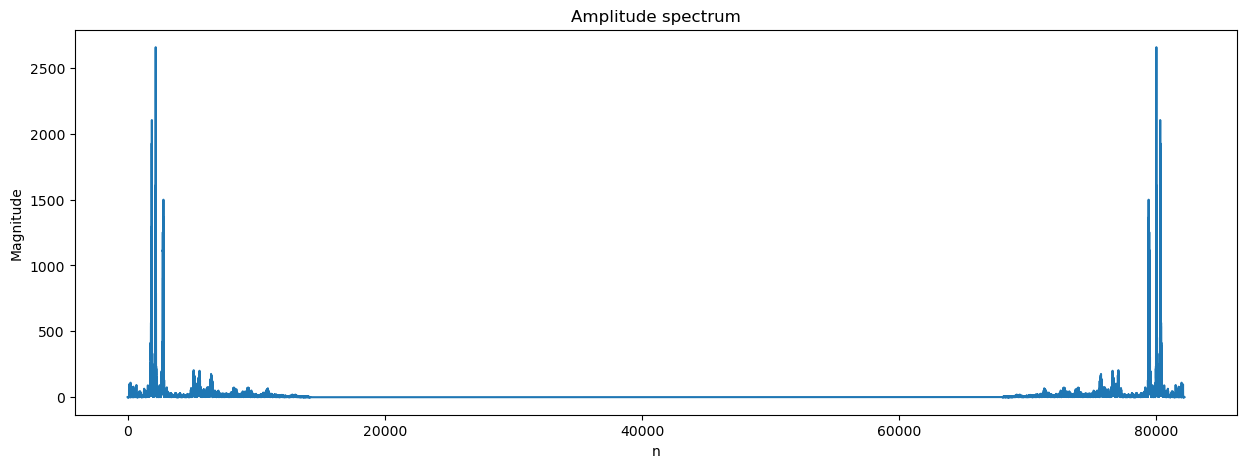

In [20]:
train_whistle_spec = scipy.fft.fft(train_whistle)
print("–ì—É–¥–æ–∫ –ø–∞—Ä–æ–≤–æ–∑–∞ –≤ —á–∞—Å—Ç–æ—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏")
draw_spec(train_whistle_spec, draw_p=False, figsize=(15,5))

# –ó–∞–¥–∞–Ω–∏–µ 4 (2 –±–∞–ª–ª–∞)
–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ 3 –æ—Å–Ω–æ–≤–Ω—ã–µ –≥–∞—Ä–º–æ–Ω–∏–∫–∏ –ø–∞—Ä–æ–≤–æ–∑–Ω–æ–≥–æ –≥—É–¥–∫–∞.

–û—Ç–≤–µ—Ç –æ–∫—Ä—É–≥–ª–∏—Ç–µ –¥–æ –¥–≤—É—Ö –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π.


–ê–º–ø–ª–∏—Ç—É–¥–Ω—ã–π —Å–ø–µ–∫—Ç—Ä

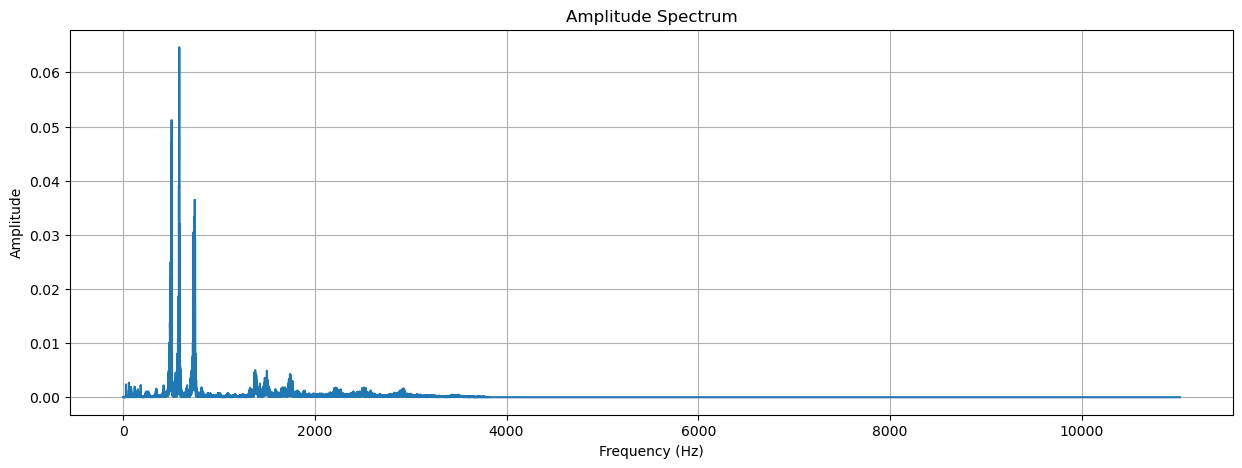

In [50]:
def draw_amp_spec(signal, tw_sr, figsize=(10, 4)):
    N = len(signal)
    T = 1.0 / tw_sr
    spectrum = scipy.fft.fft(signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    yf = 2.0 / N * np.abs(spectrum[:N//2])
    plt.figure(figsize=figsize)
    plt.plot(xf, yf)
    plt.title("Amplitude Spectrum")
    plt.grid()
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()

draw_amp_spec(train_whistle, tw_sr, figsize=(15, 5))

### 1 –≥–∞—Ä–º–æ–Ω–∏–∫–∞

In [59]:
fft_result = np.fft.fft(train_whistle)
amplitudes = np.abs(fft_result)
freqs = np.fft.fftfreq(len(train_whistle), 1/tw_sr)
positive_freqs = freqs[:len(freqs)//2]
positive_amplitudes = amplitudes[:len(amplitudes)//2]
sorted_indices = np.argsort(positive_amplitudes)[::-1]
harmonics = positive_freqs[sorted_indices[:4
                                         ]]
harmonics = np.round(harmonics, 2)
print(harmonics[0])

585.76


### 2 –≥–∞—Ä–º–æ–Ω–∏–∫–∞

In [57]:
print(harmonics[2])

584.96


### 3 –≥–∞—Ä–º–æ–Ω–∏–∫–∞

In [60]:
print(harmonics[3])

505.8


### –¢–µ—Å—Ç

In [61]:
# task_answer = [ freq1, freq2, freq3 ]
task_answer = [585.76, 584.96, 505.8]

In [62]:
assert type(task_answer) == list or type(task_answer) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(task_answer)}"
assert len(task_answer) == 3, \
        f"Wrong len {len(task_answer)}."
assert (round(sum(task_answer)) == 1677 and round(np.var(task_answer)) == 1407) or \
        (abs(sum(task_answer)  - 1836) <= 3 and abs(np.var(task_answer) - 10153) <= 181), \
        f"Wrong freqs"
print("Correct!")       

Correct!


–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–π—Ç–µ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Å–∏–≥–Ω–∞–ª, —Å–æ—Å—Ç–æ—è—â–∏–π —Ç–æ–ª—å–∫–æ –∏–∑ —ç—Ç–∏—Ö –≥–∞—Ä–º–æ–Ω–∏–∫. –í–æ—Å–ø—Ä–æ–∏–∑–≤–µ–¥–∏—Ç–µ —Å–∏–≥–Ω–∞–ª.

In [63]:
duration = 2.0
sampling_rate = 44100
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
task_answer = [585.76, 584.96, 505.8]
signal = np.zeros_like(t)
for harmonic in task_answer:
    signal += np.sin(2 * np.pi * harmonic * t)
signal /= np.max(np.abs(signal))
ipd.Audio(signal, rate=sampling_rate)

# –ê–Ω–∞–ª–∏–∑ –¥–≤—É—Ö—Ç–æ–Ω–∞–ª—å–Ω–æ–≥–æ –º–Ω–æ–≥–æ—á–∞—Å—Ç–æ—Ç–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
–¢–µ–ø–µ—Ä—å —Ä–∞—Å–º–æ—Ç—Ä–∏–º –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–π —Å–∏–≥–Ω–∞–ª - [DTMF](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling). –¢–∞–∫–∏–µ —Å–∏–≥–Ω–∞–ª—ã –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –Ω–∞–±–æ—Ä–∞ —Ç–µ–ª–µ—Ñ–æ–Ω–Ω–æ–≥–æ –Ω–æ–º–µ—Ä–∞. 

# –ó–∞–¥–∞–Ω–∏–µ 5 (2 –±–∞–ª–ª–∞)
–í –¥–∞–Ω–Ω–æ–º –∞—É–¥–∏–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω —Ç—Ä–µ—Ö–∑–Ω–∞—á–Ω—ã–π –Ω–æ–º–µ—Ä. –ò—Å–ø–æ–ª—å–∑—É—è —Ç–∞–±–ª–∏—Ü—É —Å [wiki]:(https://ru.wikipedia.org/wiki/DTMF) –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ, —á—Ç–æ –∑–∞ –Ω–æ–º–µ—Ä –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω.


–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

Len is 243102. Sample rate is 22050


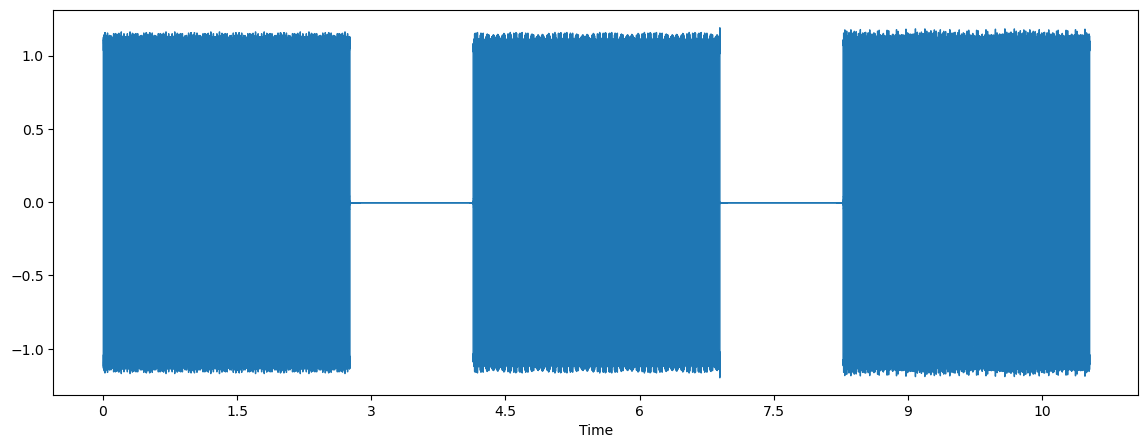

In [64]:
#dtmf.wav
dtmf, dtmf_sr = librosa.core.load("dtmf.wav")
print(f"Len is {len(dtmf)}. Sample rate is {dtmf_sr}")
player = ipd.Audio(dtmf, rate=dtmf_sr)
ipd.display(player)
draw_waveform(dtmf, sr=dtmf_sr)

In [75]:
dtmf_freq_table = {
    (697, 1209): '1', (697, 1336): '2', (697, 1477): '3',
    (770, 1209): '4', (770, 1336): '5', (770, 1477): '6',
    (852, 1209): '7', (852, 1336): '8', (852, 1477): '9',
    (941, 1209): '*', (941, 1336): '0', (941, 1477): '#'
}

def analyze_dtmf_signal(signal, sr):
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), 1/sr)
    positive_freqs = freqs[:len(freqs)//2]
    amplitudes = np.abs(fft_result)[:len(freqs)//2]
    sorted_indices = np.argsort(amplitudes)[::-1]
    main_freqs = positive_freqs[sorted_indices[:2]]
    main_freqs = np.round(main_freqs).astype(int)
    return tuple(sorted(main_freqs))

n_digits = 3
digit_duration = int(len(dtmf) / n_digits)

### 1 —á–∏—Å–ª–æ

In [76]:
start = 0 * digit_duration
end = (0 + 1) * digit_duration
digit_signal = dtmf[start:end]
main_freqs = analyze_dtmf_signal(digit_signal, dtmf_sr)

if main_freqs in dtmf_freq_table:
    digit = dtmf_freq_table[main_freqs]
    decoded_number += digit
    print(f"–ß–∞—Å—Ç–æ—Ç—ã –¥–ª—è —Ü–∏—Ñ—Ä—ã {i+1}: {main_freqs} -> –¶–∏—Ñ—Ä–∞: {digit}")
else:
    print(f"–ù–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –¥–ª—è —á–∞—Å—Ç–æ—Ç: {main_freqs}")

–ß–∞—Å—Ç–æ—Ç—ã –¥–ª—è —Ü–∏—Ñ—Ä—ã 3: (697, 1209) -> –¶–∏—Ñ—Ä–∞: 1


### 2 —á–∏—Å–ª–æ

In [77]:
start = 1 * digit_duration
end = (1 + 1) * digit_duration
digit_signal = dtmf[start:end]
main_freqs = analyze_dtmf_signal(digit_signal, dtmf_sr)

if main_freqs in dtmf_freq_table:
    digit = dtmf_freq_table[main_freqs]
    decoded_number += digit
    print(f"–ß–∞—Å—Ç–æ—Ç—ã –¥–ª—è —Ü–∏—Ñ—Ä—ã {i+1}: {main_freqs} -> –¶–∏—Ñ—Ä–∞: {digit}")
else:
    print(f"–ù–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –¥–ª—è —á–∞—Å—Ç–æ—Ç: {main_freqs}")

–ß–∞—Å—Ç–æ—Ç—ã –¥–ª—è —Ü–∏—Ñ—Ä—ã 3: (770, 1336) -> –¶–∏—Ñ—Ä–∞: 5


### 3 —á–∏—Å–ª–æ

In [78]:
start = 2 * digit_duration
end = (2 + 1) * digit_duration
digit_signal = dtmf[start:end]
main_freqs = analyze_dtmf_signal(digit_signal, dtmf_sr)

if main_freqs in dtmf_freq_table:
    digit = dtmf_freq_table[main_freqs]
    decoded_number += digit
    print(f"–ß–∞—Å—Ç–æ—Ç—ã –¥–ª—è —Ü–∏—Ñ—Ä—ã {i+1}: {main_freqs} -> –¶–∏—Ñ—Ä–∞: {digit}")
else:
    print(f"–ù–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –¥–ª—è —á–∞—Å—Ç–æ—Ç: {main_freqs}")

–ß–∞—Å—Ç–æ—Ç—ã –¥–ª—è —Ü–∏—Ñ—Ä—ã 3: (852, 1477) -> –¶–∏—Ñ—Ä–∞: 9


### –¢–µ—Å—Ç

In [69]:
#phone_number = [first: int, second: int, third: int]
phone_number = [1, 5, 9]

In [70]:
assert type(phone_number) == list or type(phone_number) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(phone_number)}"
assert len(phone_number) == 3, \
        f"Wrong len {len(phone_number)}."
assert round(np.mean(phone_number)) == 5 and round(np.var(phone_number)) == 11 , \
        f"Wrong number"
assert hashlib.md5(''.join(map(str, phone_number)).encode()).hexdigest() == "140f6969d5213fd0ece03148e62e461e", \
        f"Wrong hash. How did you pass mean/var test?"
print("Correct!")   

Correct!
